The datasets involved to perform Task 2 and Task 3

1. covid_confirmed_usafacts.csv - 
            confirmed number of COVID cases 

2. covid_deaths_usafacts.csv - 
            number of deaths due to COVID 

3. covid_county_population_usafacts.csv - 
            population in a county and state

4. Hospital_dataset_new.csv
            Hospital bed utilization

## Calculate COVID-19 data trends for last week of the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Reading Confirmed cases datasets

In [2]:
# read data from
covid_confirmed_ds = pd.read_csv("../../../../data/stage_1/covid_confirmed_usafacts.csv")
covid_confirmed_ds = pd.DataFrame(covid_confirmed_ds)

#Convert the wide column to long format
melt1 = pd.melt(frame = covid_confirmed_ds, id_vars = ['countyFIPS','County Name','State','StateFIPS'], var_name = ['date'], value_name = 'confirmed')
melt1.tail()

,countyFIPS,County Name,State,StateFIPS,date,confirmed
2388359,56037,Sweetwater County,WY,56,2022-02-07,10655
2388360,56039,Teton County,WY,56,2022-02-07,9477
2388361,56041,Uinta County,WY,56,2022-02-07,5523
2388362,56043,Washakie County,WY,56,2022-02-07,2234
2388363,56045,Weston County,WY,56,2022-02-07,1508


In [3]:
covid_confirmed_ds.dtypes

countyFIPS      int64
County Name    object
State          object
StateFIPS       int64
2020-01-22      int64
                ...  
2022-02-03      int64
2022-02-04      int64
2022-02-05      int64
2022-02-06      int64
2022-02-07      int64
Length: 752, dtype: object


## Getting last 7 days data 

In [4]:
last_week_coviddata = covid_confirmed_ds[covid_confirmed_ds["State"] == "AL"].iloc[:,-7:]
last_week_coviddata

,2022-02-01,2022-02-02,2022-02-03,2022-02-04,2022-02-05,2022-02-06,2022-02-07
0,0,0,0,0,0,0,0
1,14826,14826,14826,14970,14970,14970,15046
2,53083,53083,53083,53559,53559,53559,53768
3,5297,5297,5297,5338,5338,5338,5356
4,6158,6158,6158,6204,6204,6204,6224
...,...,...,...,...,...,...,...
63,52074,52074,52074,52461,52461,52461,52640
64,17677,17677,17677,17800,17800,17800,17865
65,3462,3462,3462,3491,3491,3491,3501
66,2711,2711,2711,2751,2751,2751,2764


## Getting the sum of all the days retrieved above

2022-02-01    1229300
2022-02-02    1229300
2022-02-03    1229300
2022-02-04    1240496
2022-02-05    1240496
2022-02-06    1240496
2022-02-07    1245876
dtype: int64


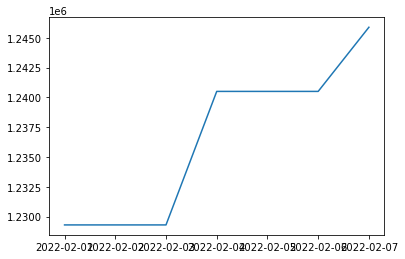

In [5]:
sum = last_week_coviddata.sum()
print(sum)
plt.plot(sum)

We observe that the covid cases in the initial week were less but during the mid week from 3rd Feb to 4th Feb the no. of cases spiked. 5th Feb and  6th Feb there waas a weekend and so no cases were reported. Also, from monday the cases rose.

## Reading the Covide deaths dataset

In [6]:
covid_deaths_ds = pd.read_csv("../../../../data/stage_1/covid_deaths_usafacts.csv" , error_bad_lines = False)
covid_deaths_df = pd.DataFrame(covid_deaths_ds)


#Convert the wide column to long format
melt1 = pd.melt(frame = covid_confirmed_ds, id_vars = ['countyFIPS','County Name','State','StateFIPS'], var_name = ['date'], value_name = 'deaths')
melt1.tail()


,countyFIPS,County Name,State,StateFIPS,date,deaths
2388359,56037,Sweetwater County,WY,56,2022-02-07,10655
2388360,56039,Teton County,WY,56,2022-02-07,9477
2388361,56041,Uinta County,WY,56,2022-02-07,5523
2388362,56043,Washakie County,WY,56,2022-02-07,2234
2388363,56045,Weston County,WY,56,2022-02-07,1508


## Fetching Albama state's last week Covid data

In [7]:
last_week_coviddeaths = covid_deaths_ds[covid_deaths_ds["State"] == "AL"].iloc[:,-7:]
last_week_coviddeaths

,2022-02-01,2022-02-02,2022-02-03,2022-02-04,2022-02-05,2022-02-06,2022-02-07
0,0,0,0,0,0,0,0
1,168,168,168,170,170,170,171
2,616,616,616,623,623,623,624
3,85,85,85,85,85,85,85
4,96,96,96,96,96,96,96
...,...,...,...,...,...,...,...
63,691,691,691,695,695,695,696
64,398,398,398,399,399,399,399
65,53,53,53,53,53,53,53
66,39,39,39,40,40,40,40


2022-02-01    17215
2022-02-02    17215
2022-02-03    17215
2022-02-04    17371
2022-02-05    17371
2022-02-06    17371
2022-02-07    17387
dtype: int64


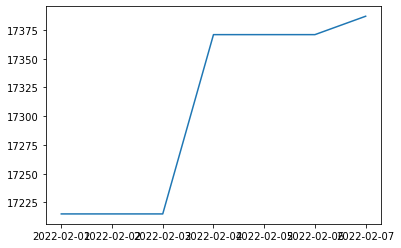

In [8]:
sum = last_week_coviddeaths.sum()
print(sum)
plt.plot(sum)

From the above graph we infer that initially the death rate was less but on 3rd the no. of deaths spiked and increased drastically till 4th of Feb. As compared to the above graph both the trends are matching that is with the increase in the covid cases the death rate is also increasing. 

In [19]:
# read data 
covid_population_ds = pd.read_csv("../../../../data/stage_1/covid_county_population_usafacts.csv")
covid_population_df = pd.DataFrame(covid_population_ds)

#Convert the wide column to long format
melt1 = pd.melt(frame = covid_confirmed_ds, id_vars = ['countyFIPS','County Name','State','StateFIPS'], var_name = ['date'], value_name = 'population')
melt1.tail(10)

,countyFIPS,County Name,State,StateFIPS,date,population
2388354,56027,Niobrara County,WY,56,2022-02-07,626
2388355,56029,Park County,WY,56,2022-02-07,6558
2388356,56031,Platte County,WY,56,2022-02-07,1850
2388357,56033,Sheridan County,WY,56,2022-02-07,7846
2388358,56035,Sublette County,WY,56,2022-02-07,1873
2388359,56037,Sweetwater County,WY,56,2022-02-07,10655
2388360,56039,Teton County,WY,56,2022-02-07,9477
2388361,56041,Uinta County,WY,56,2022-02-07,5523
2388362,56043,Washakie County,WY,56,2022-02-07,2234
2388363,56045,Weston County,WY,56,2022-02-07,1508


## Reading the enrichment dataset 

In [21]:
# read data from
enrichment_ds = pd.read_csv("../../../../data/stage_1/hospital_dataset_new.csv")
enrichment_df = pd.DataFrame(enrichment_ds)
enrichment_df.head(20)

,State,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,staffed_icu_adult_patients_confirmed_and_suspected_covid,staffed_icu_adult_patients_confirmed_covid,total_adult_patients_hospitalized_confirmed_and_suspected_covid,total_adult_patients_hospitalized_confirmed_covid,total_staffed_adult_icu_beds,inpatient_beds_utilization,percent_of_inpatients_with_covid,inpatient_bed_covid_utilization,adult_icu_bed_covid_utilization,adult_icu_bed_utilization,reporting_cutoff_start,deaths_covid
0,OR,5,49,7093,5614,1117,184,163,1082,979,776,0.791485,0.202906,0.161067,0.245007,0.793814,2/9/2022,14.0
1,PA,7,79,29586,24015,2883,470,439,2798,2495,3600,0.811701,0.121272,0.098601,0.134401,0.759722,2/9/2022,39.0
2,PR,0,8,8938,5482,229,54,42,213,194,664,0.608078,0.042652,0.025374,0.082019,0.740964,2/9/2022,0.0
3,RI,1,1,2337,1946,130,24,23,126,122,139,0.832691,0.066804,0.055627,0.172662,0.848921,2/9/2022,0.0
4,SC,22,60,11712,9208,1440,280,278,1411,1374,1323,0.786202,0.158364,0.124665,0.218409,0.769463,2/9/2022,15.0
5,SD,0,54,2413,1648,247,60,60,238,222,249,0.682967,0.152375,0.105241,0.250000,0.558233,2/9/2022,0.0
6,TN,2,125,19944,14531,2753,544,548,2672,2607,2312,0.728590,0.192814,0.140330,0.244714,0.735727,2/9/2022,30.0
7,TX,8,105,67897,52625,8834,1997,1970,8538,7931,6866,0.775071,0.169836,0.131576,0.298684,0.902709,2/9/2022,146.0
8,UT,0,48,6178,3740,617,134,134,566,544,537,0.605374,0.166712,0.101148,0.254269,0.761639,2/9/2022,3.0
9,VA,13,70,17829,13391,1855,370,363,1811,1672,1933,0.751080,0.140180,0.105320,0.196704,0.727367,2/9/2022,29.0


In [22]:
enrichment_df.dtypes

State                                                               object
critical_staffing_shortage_today_yes                                 int64
critical_staffing_shortage_today_no                                  int64
inpatient_beds                                                       int64
inpatient_beds_used                                                  int64
inpatient_beds_used_covid                                            int64
staffed_icu_adult_patients_confirmed_and_suspected_covid             int64
staffed_icu_adult_patients_confirmed_covid                           int64
total_adult_patients_hospitalized_confirmed_and_suspected_covid      int64
total_adult_patients_hospitalized_confirmed_covid                    int64
total_staffed_adult_icu_beds                                         int64
inpatient_beds_utilization                                         float64
percent_of_inpatients_with_covid                                   float64
inpatient_bed_covid_utili

In [23]:
enrichment_df.isnull()

,State,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,staffed_icu_adult_patients_confirmed_and_suspected_covid,staffed_icu_adult_patients_confirmed_covid,total_adult_patients_hospitalized_confirmed_and_suspected_covid,total_adult_patients_hospitalized_confirmed_covid,total_staffed_adult_icu_beds,inpatient_beds_utilization,percent_of_inpatients_with_covid,inpatient_bed_covid_utilization,adult_icu_bed_covid_utilization,adult_icu_bed_utilization,reporting_cutoff_start,deaths_covid
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## From the above data set am trying to predict the total no. of hospital beds and the used beds so as to get an idea of whether a person can be admitted to that hospital. 

In [28]:
enrichment_df.describe()

Total = enrichment_df['inpatient_beds'].sum()
print(" Total Beds Available: " , Total)

Total_Used= enrichment_df['inpatient_beds_used_covid'].sum()
print(" Total Beds Used: " , Total_Used)

 Total Beds Available:  763947
 Total Beds Used:  82842


## Read the Covid dataset and merge with the enrichment dataset

In [29]:
# read data from the merged covid datasets 
super_data = pd.read_csv("../../../../data/stage_1/superdataset.csv")
super_data_df = pd.DataFrame(super_data)
super_data_df.tail
super_data.tail(20)


,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population
2346456,56045,weston county,WY,2022-01-19,1332,16,6927
2346457,56045,weston county,WY,2022-01-20,1341,16,6927
2346458,56045,weston county,WY,2022-01-21,1349,16,6927
2346459,56045,weston county,WY,2022-01-22,1349,16,6927
2346460,56045,weston county,WY,2022-01-23,1349,16,6927
2346461,56045,weston county,WY,2022-01-24,1369,16,6927
2346462,56045,weston county,WY,2022-01-25,1387,16,6927
2346463,56045,weston county,WY,2022-01-26,1408,16,6927
2346464,56045,weston county,WY,2022-01-27,1426,16,6927
2346465,56045,weston county,WY,2022-01-28,1438,16,6927


Merging the superdataset with the enrichment data 

In [30]:
COVID_HospitalBeds_merged_df = pd.merge(super_data_df, enrichment_df , on ='State')
COVID_HospitalBeds_merged_df.tail(10)

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,inpatient_beds,...,total_adult_patients_hospitalized_confirmed_and_suspected_covid,total_adult_patients_hospitalized_confirmed_covid,total_staffed_adult_icu_beds,inpatient_beds_utilization,percent_of_inpatients_with_covid,inpatient_bed_covid_utilization,adult_icu_bed_covid_utilization,adult_icu_bed_utilization,reporting_cutoff_start,deaths_covid
2346466,56045,weston county,WY,2022-01-29,1438,16,6927,0,3,1766,...,93,96,134,0.451869,0.120823,0.054367,0.148438,0.410448,2/9/2022,2.0
2346467,56045,weston county,WY,2022-01-30,1438,16,6927,0,3,1766,...,93,96,134,0.451869,0.120823,0.054367,0.148438,0.410448,2/9/2022,2.0
2346468,56045,weston county,WY,2022-01-31,1454,16,6927,0,3,1766,...,93,96,134,0.451869,0.120823,0.054367,0.148438,0.410448,2/9/2022,2.0
2346469,56045,weston county,WY,2022-02-01,1471,17,6927,0,3,1766,...,93,96,134,0.451869,0.120823,0.054367,0.148438,0.410448,2/9/2022,2.0
2346470,56045,weston county,WY,2022-02-02,1485,17,6927,0,3,1766,...,93,96,134,0.451869,0.120823,0.054367,0.148438,0.410448,2/9/2022,2.0
2346471,56045,weston county,WY,2022-02-03,1491,17,6927,0,3,1766,...,93,96,134,0.451869,0.120823,0.054367,0.148438,0.410448,2/9/2022,2.0
2346472,56045,weston county,WY,2022-02-04,1496,17,6927,0,3,1766,...,93,96,134,0.451869,0.120823,0.054367,0.148438,0.410448,2/9/2022,2.0
2346473,56045,weston county,WY,2022-02-05,1496,17,6927,0,3,1766,...,93,96,134,0.451869,0.120823,0.054367,0.148438,0.410448,2/9/2022,2.0
2346474,56045,weston county,WY,2022-02-06,1496,17,6927,0,3,1766,...,93,96,134,0.451869,0.120823,0.054367,0.148438,0.410448,2/9/2022,2.0
2346475,56045,weston county,WY,2022-02-07,1508,17,6927,0,3,1766,...,93,96,134,0.451869,0.120823,0.054367,0.148438,0.410448,2/9/2022,2.0


In [26]:
COVID_HospitalBeds_merged_df.to_csv('../../../../data/stage_1/covid_hospitalbed_merge.csv', index=False)